In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import subprocess
import shutil
import cftime
import os

In [3]:
'''SET UP'''
source_dir = '/glade/u/home/marielj/clm_frost/'
#Casename
case = 'mbp_tuning_spinup_CONTROL_v0'

#Save directory for figures
if(not os.path.exists(source_dir + 'data-analysis/figures/cases/%s' % case)):
    os.mkdir(source_dir + 'data-analysis/figures/cases/%s' % case)
save_dir = source_dir + 'data-analysis/figures/cases/' + case + '/'

#import full transient spinup data
case_data = xr.open_mfdataset(source_dir + 'cesm_cases/stored-data/' + case + '/' + case + '.clm2.h1.*-01-01-00000.nc', 
                             parallel = True)

In [4]:
case_data

<xarray.Dataset>
Dimensions:       (levgrnd: 25, levlak: 10, levdcmp: 25, time: 1826,
                   hist_interval: 2, lndgrid: 1, levsoi: 20)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * time          (time) object 2011-01-01 00:00:00 ... 2018-01-01 00:00:00
Dimensions without coordinates: hist_interval, lndgrid, levsoi
Data variables: (12/30)
    mcdate        (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mcsec         (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mdcur         (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    mscur         (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    nstep         (time) int32 dask.array<chunksize=(365,), meta=np.ndarray>
    time_bounds   (time, hist_interval) object dask.array<chunksize=(365, 2), meta=np.ndarray>
    ...            ...
    SNOW          (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    SOILICE       (time, levsoi, lndgrid) float32 dask.array<chunksize=(365, 20, 1), meta=np.ndarray>
    TSA           (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    TSOI          (time, levgrnd, lndgrid) float32 dask.array<chunksize=(365, 25, 1), meta=np.ndarray>
    ZWT           (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
    ZWT_PERCH     (time, lndgrid) float32 dask.array<chunksize=(365, 1), meta=np.ndarray>
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 03/02/23 19:38:39
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          day_1

In [5]:
def plot_var(dataset, var, rolling = False):
    fig, ax = plt.subplots(figsize = (6,4))

    #Plot accelerated spinup data
    dataset[var].plot(linewidth = 1, alpha = 0.4, ax = ax, color = 'red')

    #Plot rolling average
    if(rolling):
        roll = dataset[var].rolling(time = 30).mean()
        plt.plot(dataset.time, roll, color = 'red', linewidth = 0.5)
    
    ax.set_title(dataset[var].long_name)
    ax.set_xlim(cftime.DatetimeNoLeap(2011, 1, 1, 0, 0, 0, 0, has_year_zero=True),
                   cftime.DatetimeNoLeap(2017, 12, 31, 0, 0, 0, 0, has_year_zero=True))

    plt.savefig(save_dir + str(var) + '.pdf', bbox_inches = 'tight')
    plt.show() 

In [6]:
vars_to_plot = ['H2OSNO', 'QINFL', 'QOVER', 'QRUNOFF', 'QSNOMELT', 'QSOIL', 'QVEGT', 'RAIN', 'SNOW', 'TSA', 'ZWT']

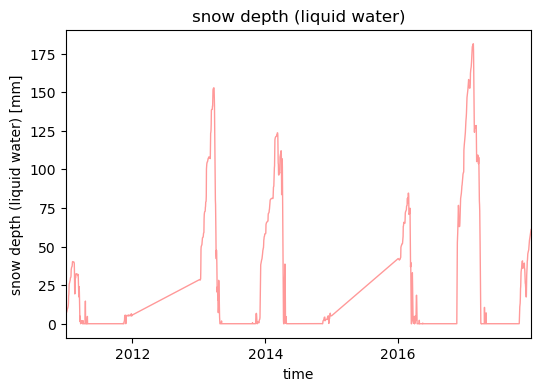

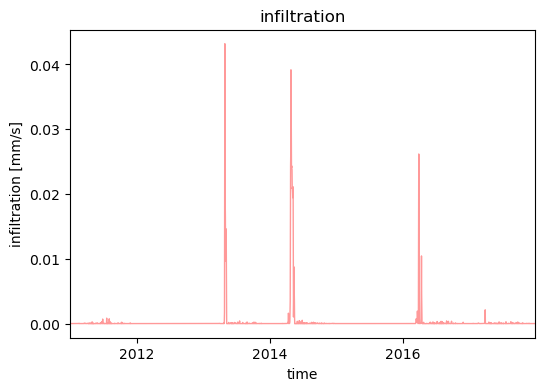

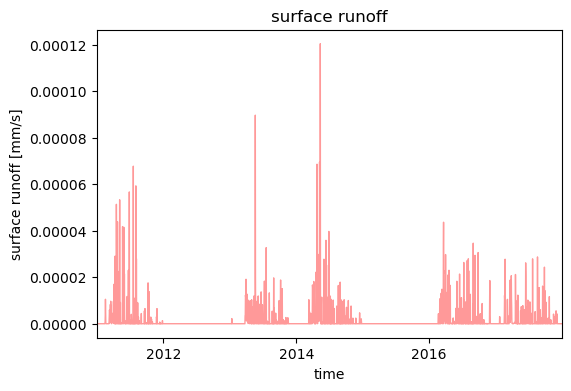

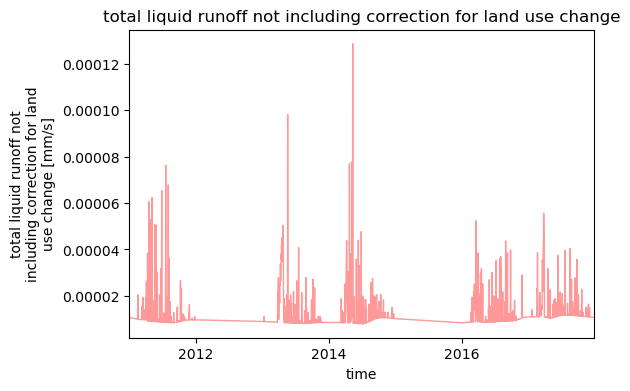

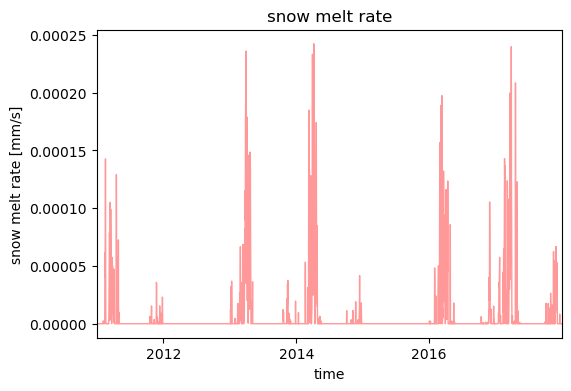

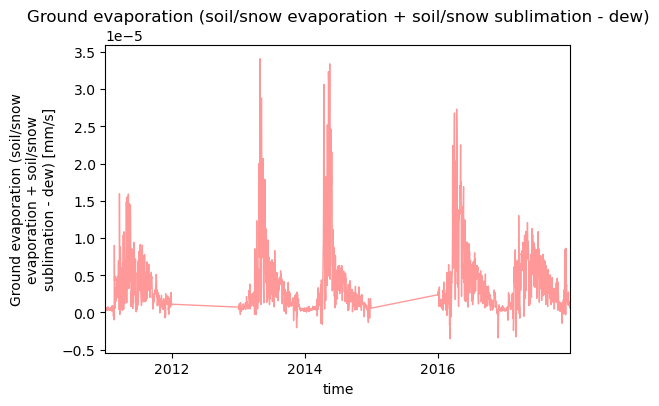

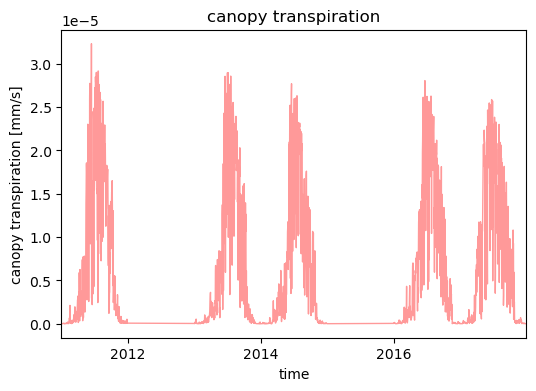

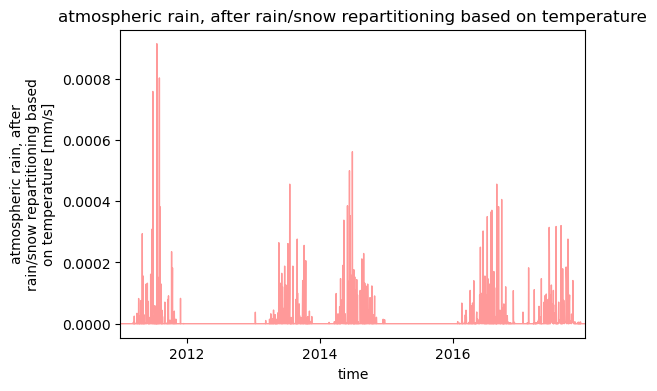

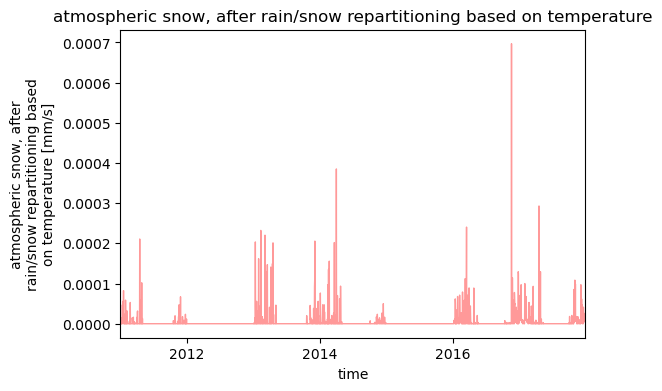

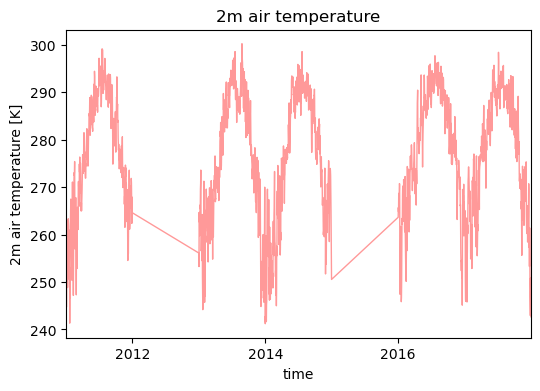

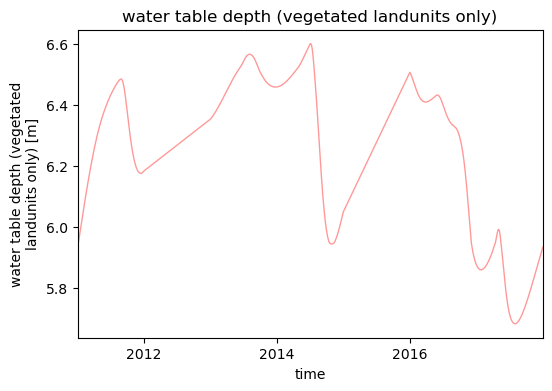

In [7]:
for v in vars_to_plot:
    plot_var(case_data, v)